## **Hands-on session Question**

Take the following dataset: https://www.kaggle.com/datasets/mbsoroush/customer-data

this is a clustering problem. solve this problem and justify which clustering algorithm will be applicable here and make sure to visualize everything with the help of graphs.



In [ ]:
from google.colab import files

files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jayeshbh","key":"4224f03da2d72578fa1d98f035754d10"}'}

In [ ]:
!kaggle datasets download -d mbsoroush/customer-data

Dataset URL: https://www.kaggle.com/datasets/mbsoroush/customer-data
License(s): other
  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 94.8MB/s]


In [ ]:
!unzip customer-data

Archive:  customer-data.zip
  inflating: Customer_Data.csv       


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/Customer_Data.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Preprocessing and understanding data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Checking for null values

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

As we can see we have null values for credit_limit and minimum_payments columns.<br>
1. Since there is only 1 credit limit missing we can afford to remove the row as we will still have 8000+ datarows left
2. Since minimum_payments have a lot of rows null. we will fill it with the median value.  

In [ ]:
df = df[~df['CREDIT_LIMIT'].isnull()]

In [ ]:
df.shape

(8949, 18)

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df.shape

(8949, 18)

we will also drop customerid

In [ ]:
df.drop(['CUST_ID'], axis=1, inplace=True)
df.shape

(8949, 17)

Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
c = df.columns
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=[c])
df.head()

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.732054         -0.249881 -0.424934        -0.356957   
1  0.786858          0.134049 -0.469584        -0.356957   
2  0.447041          0.517980 -0.107716         0.108843   
3  0.049015         -1.017743  0.231995         0.546123   
4 -0.358849          0.517980 -0.462095        -0.347317   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.349114    -0.466805           -0.806649   
1              -0.454607     2.605438           -1.221928   
2              -0.454607    -0.466805            1.269742   
3              -0.454607    -0.368678           -1.014290   
4              -0.454607    -0.466805           -1.014290   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.678716                        -0.707409   
1                  -0.678716                        -0.917090   
2                   2.673295                        -0.917090   
3                  -0.399383                        -0.917090   
4                  -0.399383                        -0.917090   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.675294        -0.476083     -0.511381    -0.960380   
1               0.573949         0.110032     -0.591841     0.688601   
2              -0.675294        -0.476083     -0.109082     0.826016   
3              -0.258882        -0.329554     -0.551611     0.826016   
4              -0.675294        -0.476083     -0.551611    -0.905414   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.529026        -0.302427        -0.525588  0.360541  
1  0.818546         0.097453         0.234159  0.360541  
2 -0.383857        -0.093330        -0.525588  0.360541  
3 -0.598733        -0.228291        -0.525588  0.360541  
4 -0.364421        -0.257295        -0.525588  0.360541

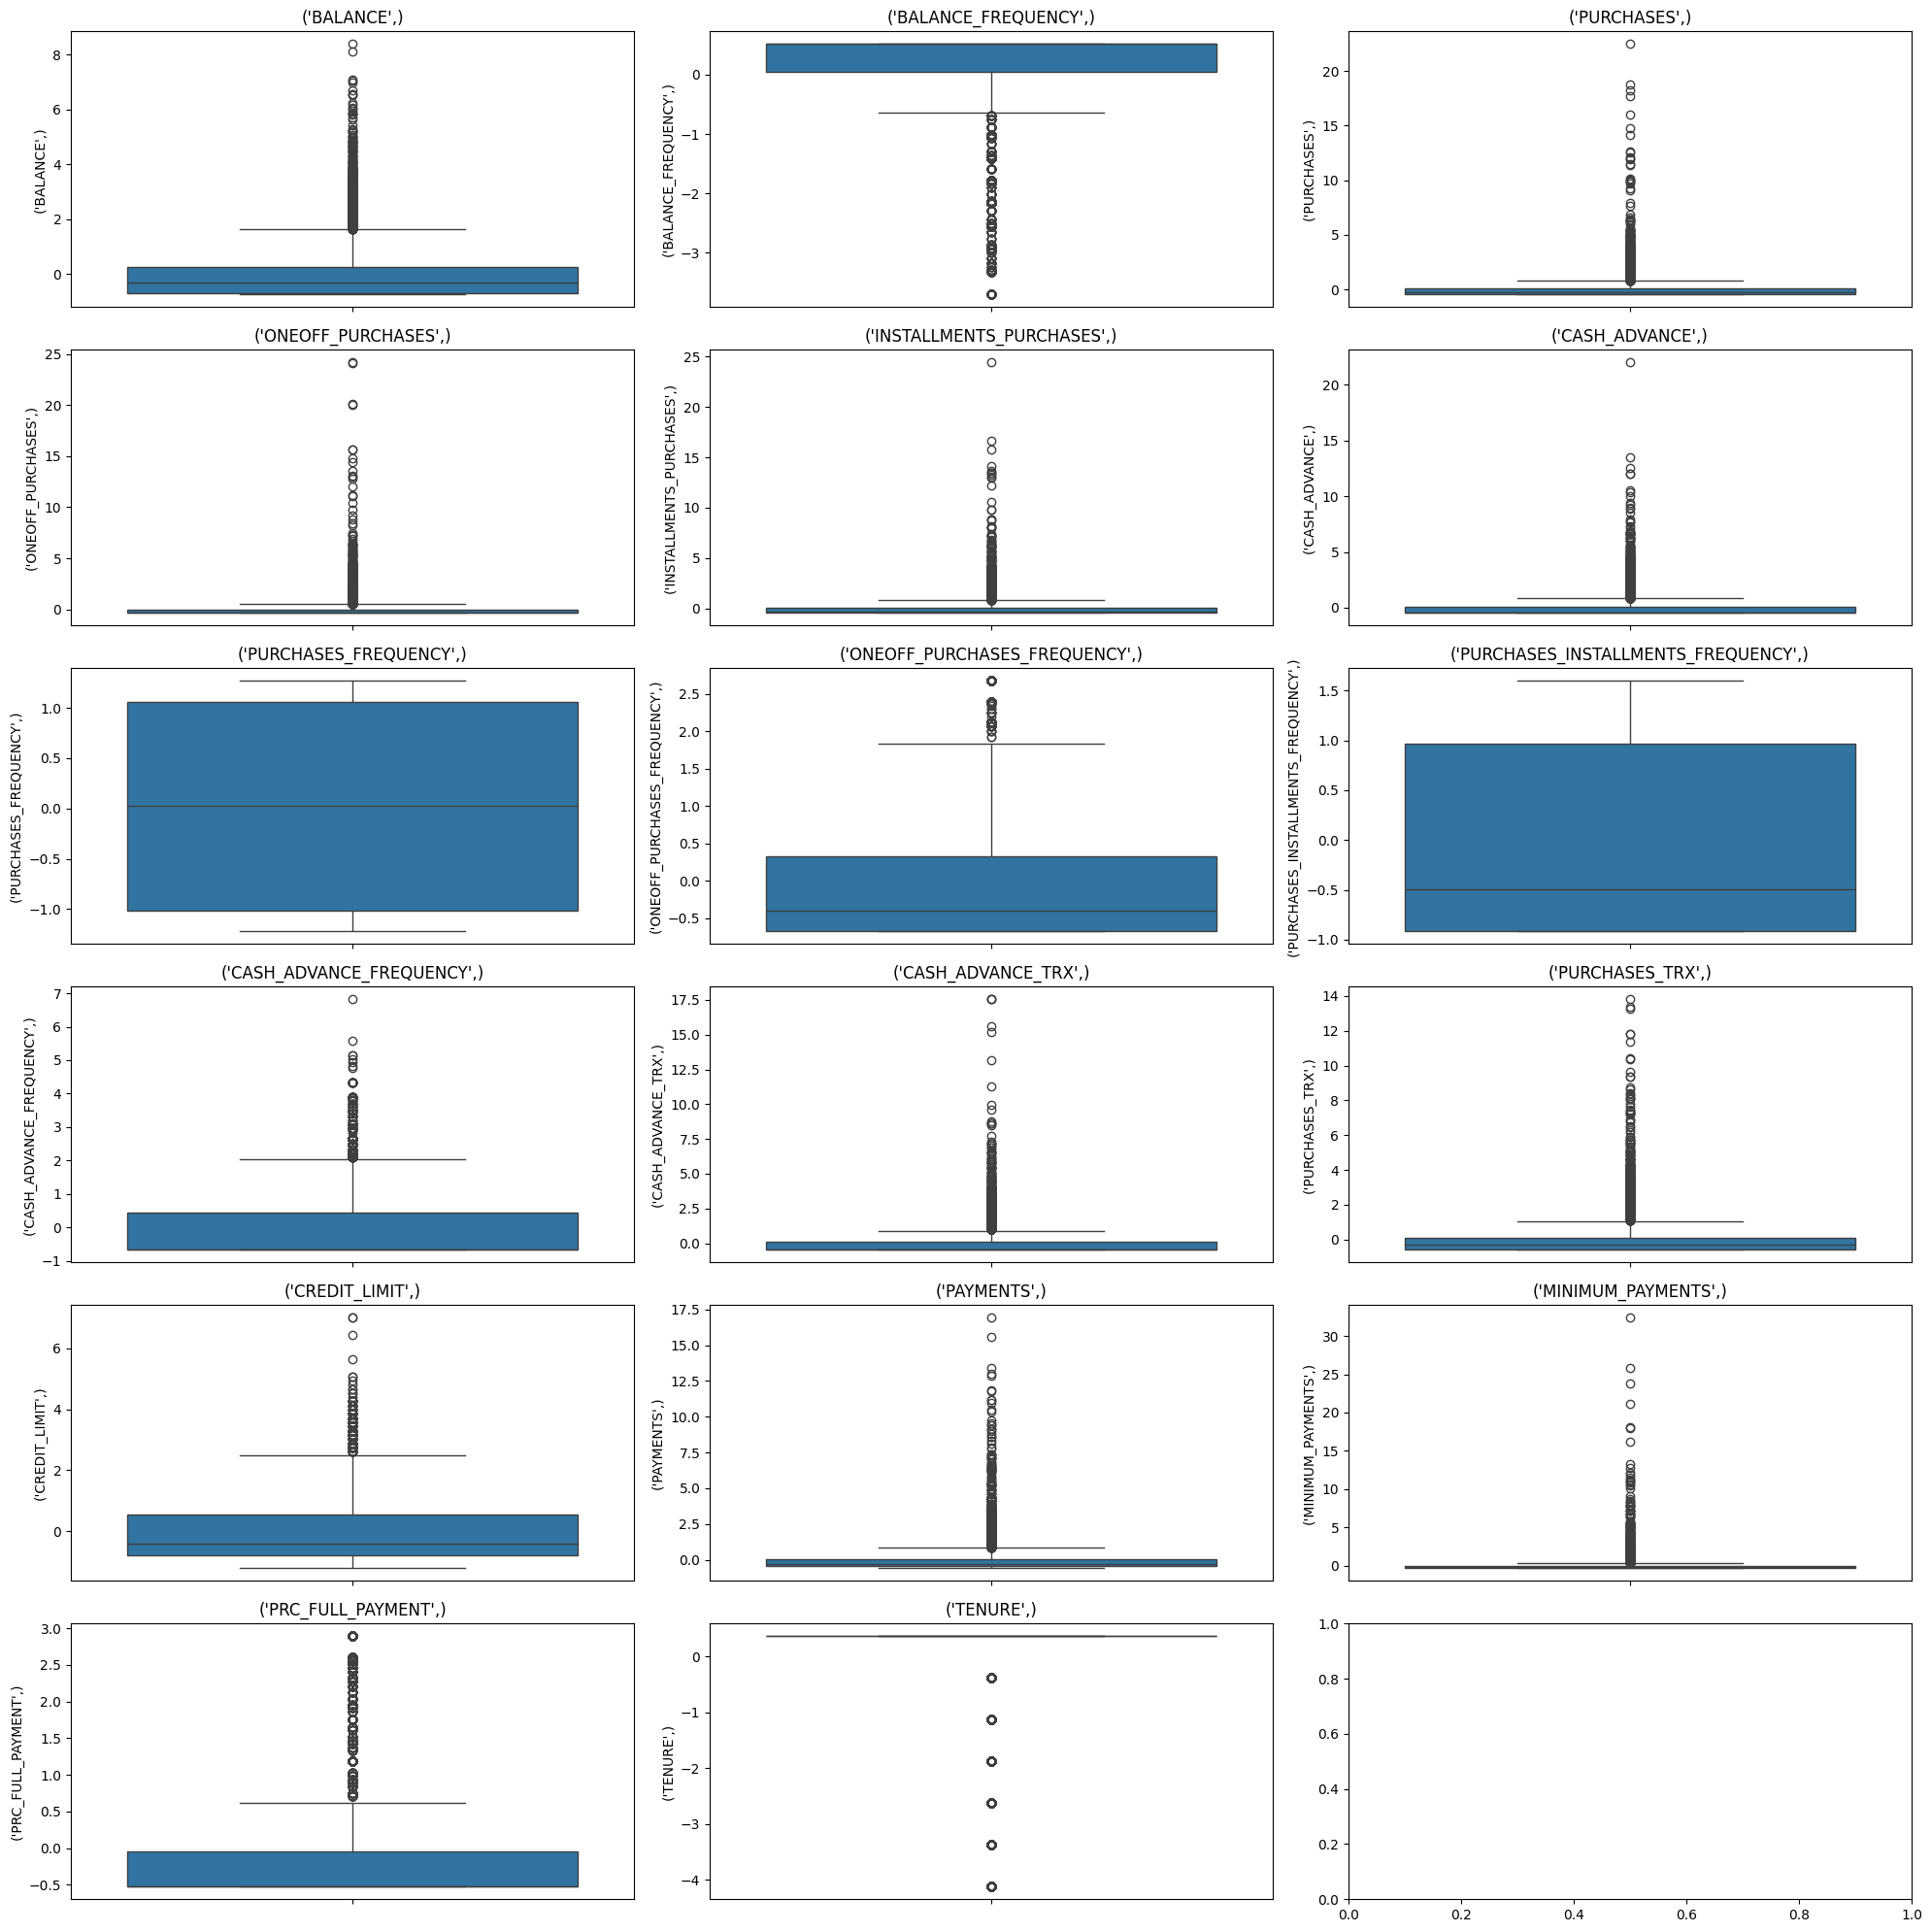

In [ ]:
dfig= plt.subplots(nrows=6 , ncols=3 , figsize=(20,20))
for i in range (len(df.columns)):
    plt.subplot(6,3,i+1)
    ax= sns.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
    plt.tight_layout()
plt.show()

As we can see the data has a lot of outliers from the above box plots. so we will remove the outliers

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Visualising the Data

We should visualize some features to understand the data

First I will change the columns name as they are lengthy and may overlap with each other when plotting certain graphs


In [ ]:
column_mapping = {
    'BALANCE': 'BAL',
    'BALANCE_FREQUENCY': 'BAL_FRQ',
    'PURCHASES': 'PUR',
    'ONEOFF_PURCHASES': 'OOP',
    'INSTALLMENTS_PURCHASES': 'INST_PUR',
    'CASH_ADVANCE': 'CASH_ADV',
    'PURCHASES_FREQUENCY': 'PUR_FRQ',
    'ONEOFF_PURCHASES_FREQUENCY': 'OOP_FRQ',
    'PURCHASES_INSTALLMENTS_FREQUENCY': 'INST_PUR_FRQ',
    'CASH_ADVANCE_FREQUENCY': 'CASH_ADV_FRQ',
    'CASH_ADVANCE_TRX': 'CASH_ADV_TRX',
    'PURCHASES_TRX': 'PUR_TRX',
    'CREDIT_LIMIT': 'CRED_LIM',
    'PAYMENTS': 'PAY',
    'MINIMUM_PAYMENTS': 'MIN_PAY',
    'PRC_FULL_PAYMENT': 'PRC_FULL_PAY',
    'TENURE': 'TEN'
}

df.rename(columns=column_mapping, inplace=True)

df.head(2)

<ipython-input-15-df73b84520f8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_mapping, inplace=True)


BAL   BAL_FRQ       PUR       OOP  INST_PUR  CASH_ADV   PUR_FRQ  \
0 -0.732054 -0.249881 -0.424934 -0.356957 -0.349114 -0.466805 -0.806649   
4 -0.358849  0.517980 -0.462095 -0.347317 -0.454607 -0.466805 -1.014290   

    OOP_FRQ INST_PUR_FRQ CASH_ADV_FRQ CASH_ADV_TRX   PUR_TRX  CRED_LIM  \
0 -0.678716    -0.707409    -0.675294    -0.476083 -0.511381 -0.960380   
4 -0.399383    -0.917090    -0.675294    -0.476083 -0.551611 -0.905414   

        PAY   MIN_PAY PRC_FULL_PAY       TEN  
0 -0.529026 -0.302427    -0.525588  0.360541  
4 -0.364421 -0.257295    -0.525588  0.360541

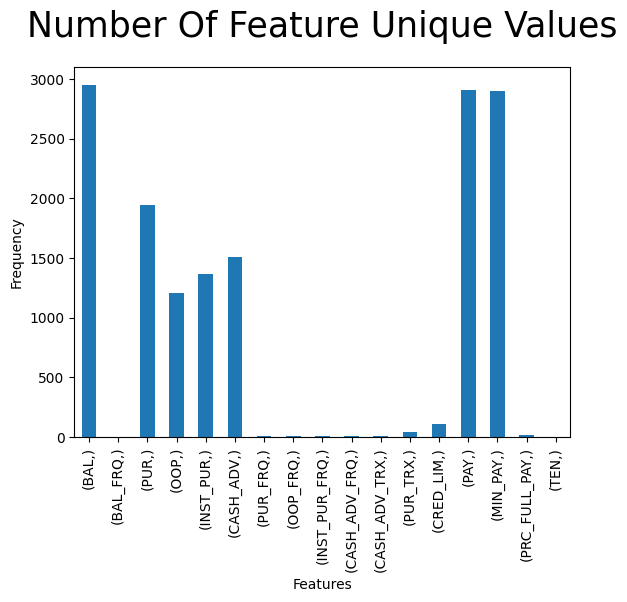

In [ ]:
counts = df.nunique()
ax = counts.plot.bar()
plt.title("Number Of Feature Unique Values", size = 25, y = 1.06)
plt.ylabel("Frequency")
plt.xlabel("Features")

plt.show()

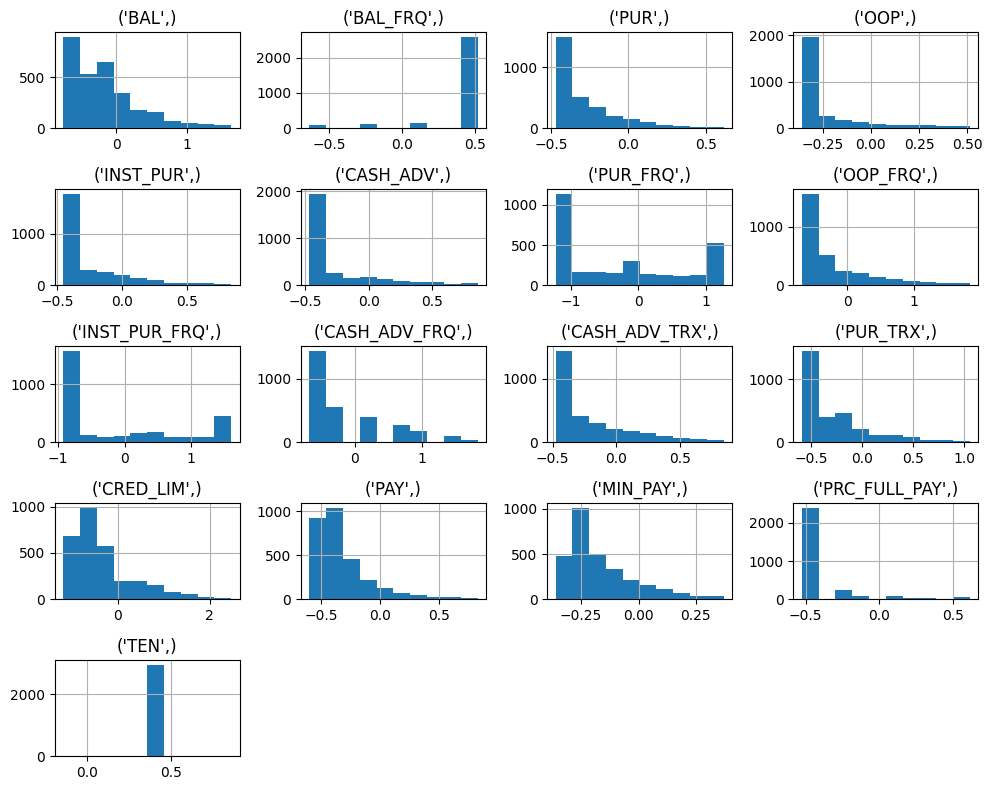

In [ ]:
df.hist(figsize=(10,8))
plt.tight_layout()

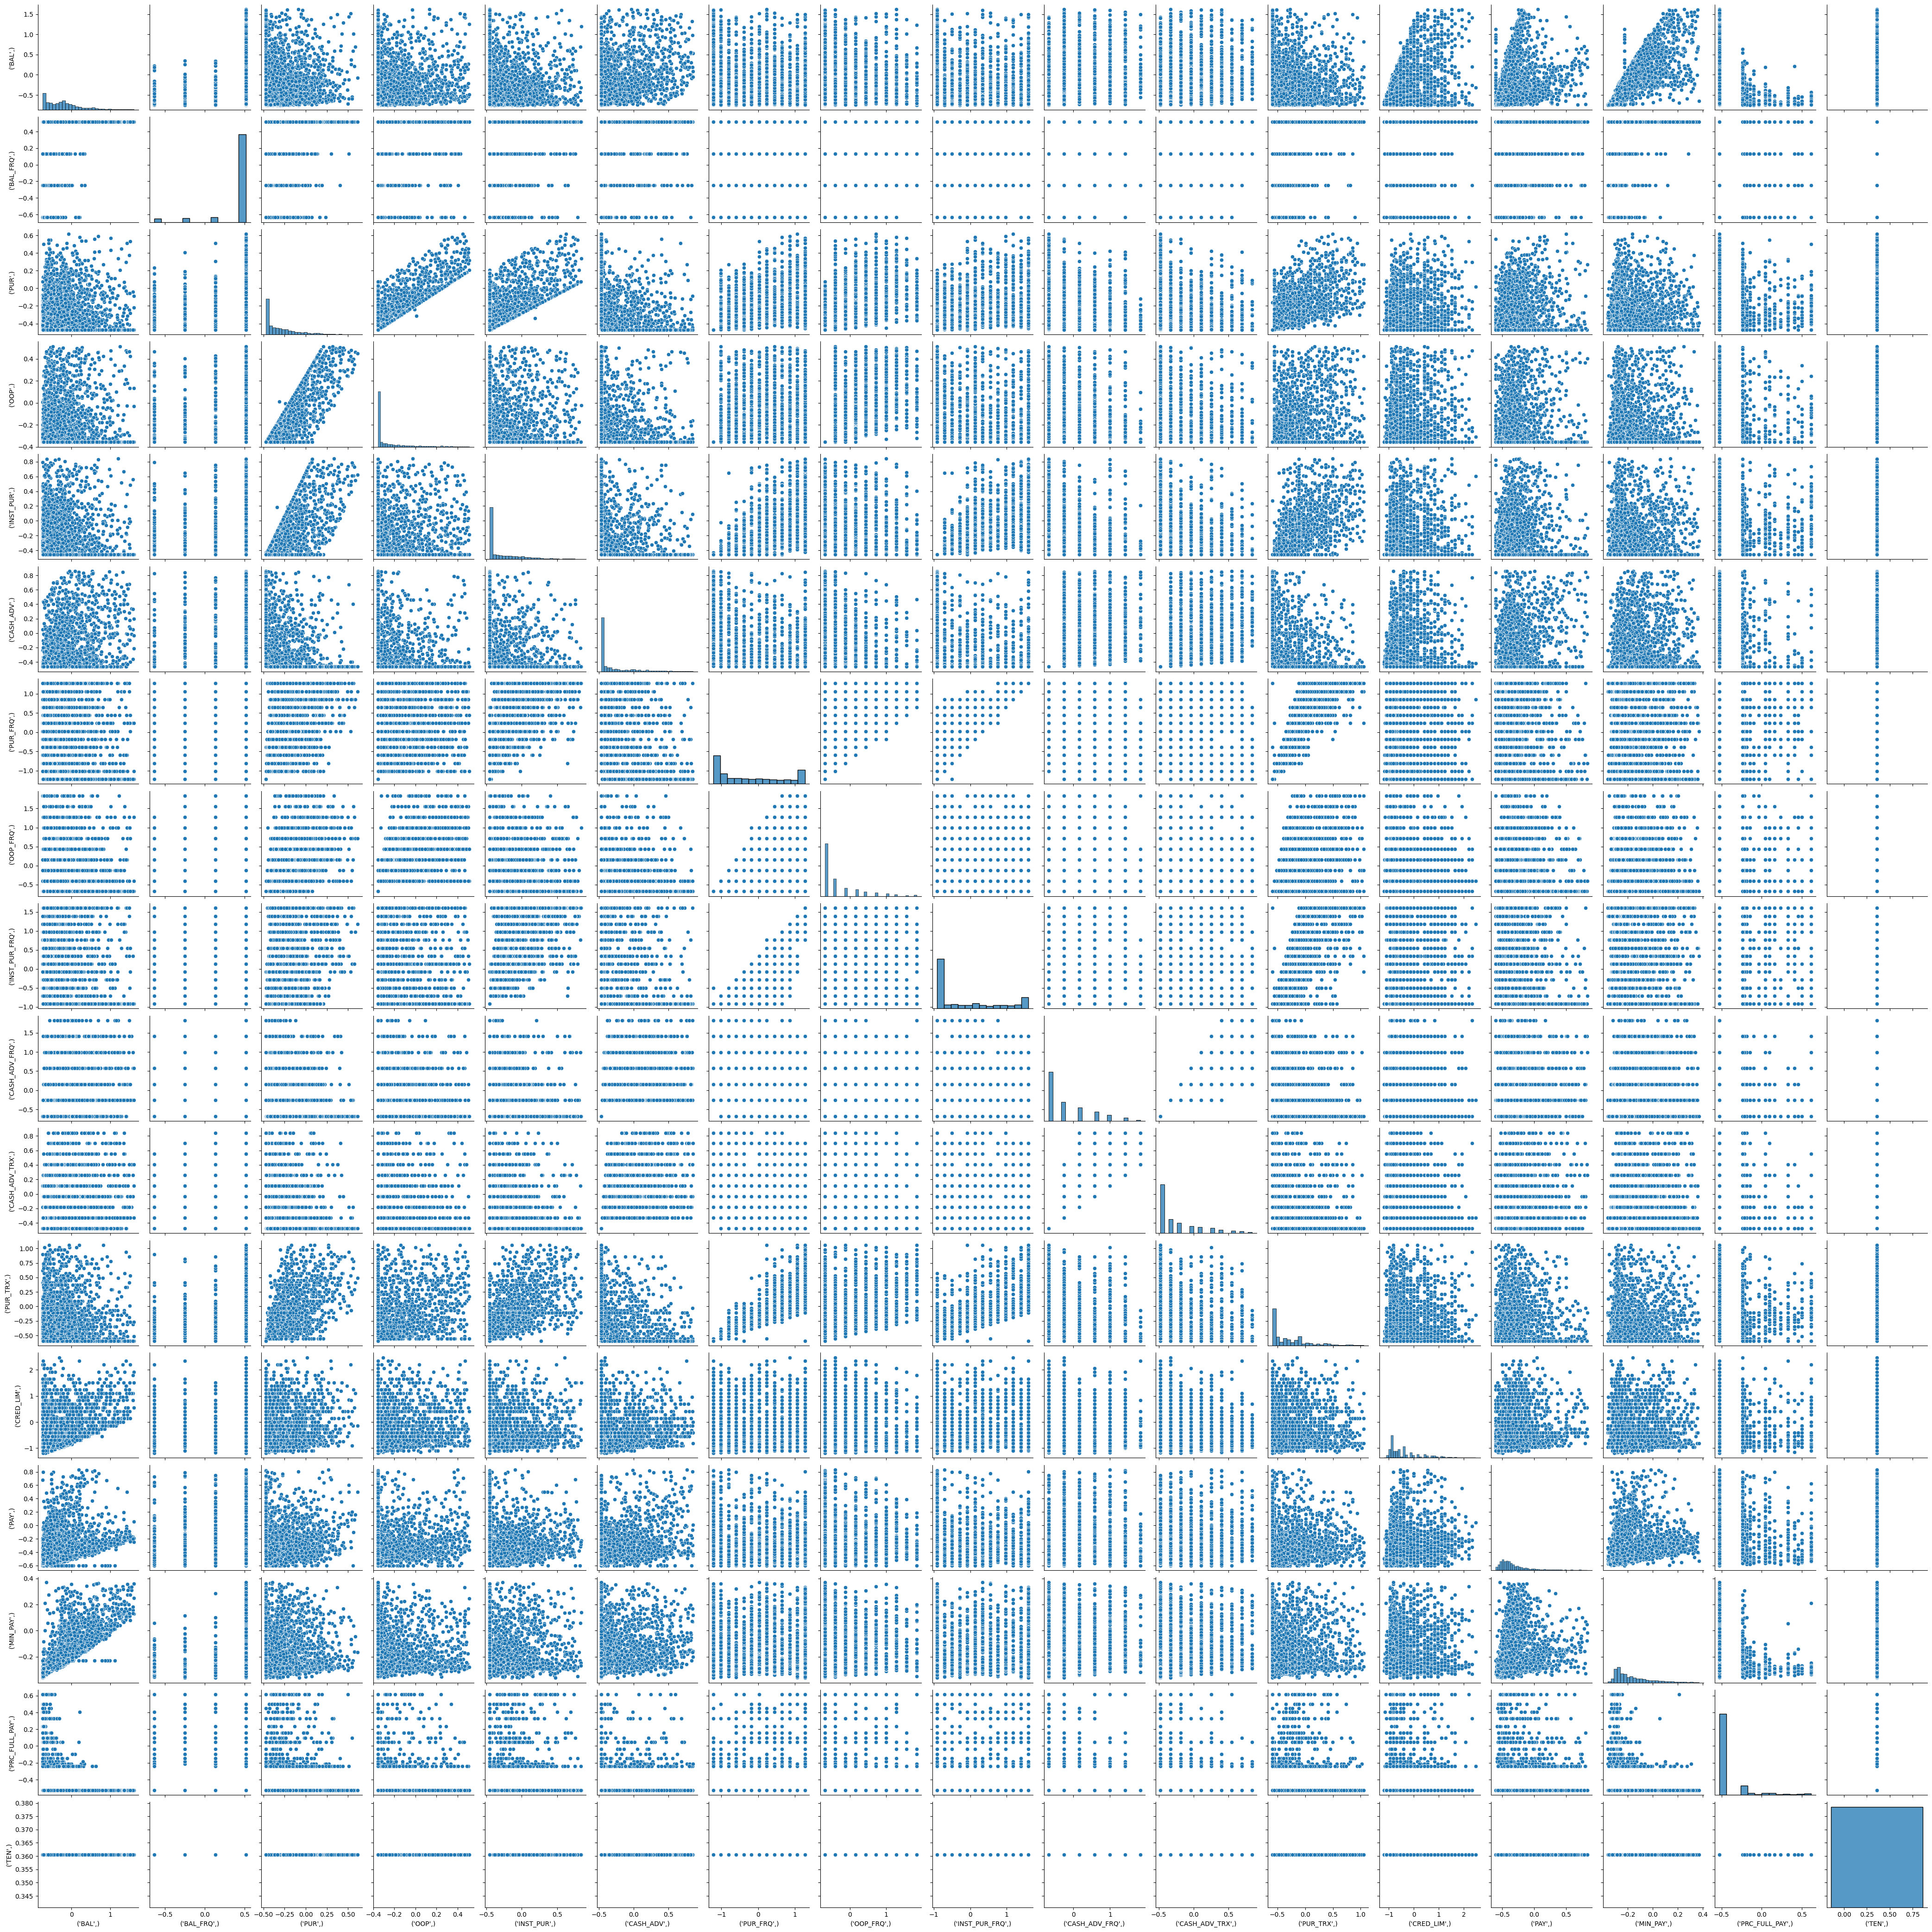

In [ ]:
sns.pairplot(df)
plt.show()

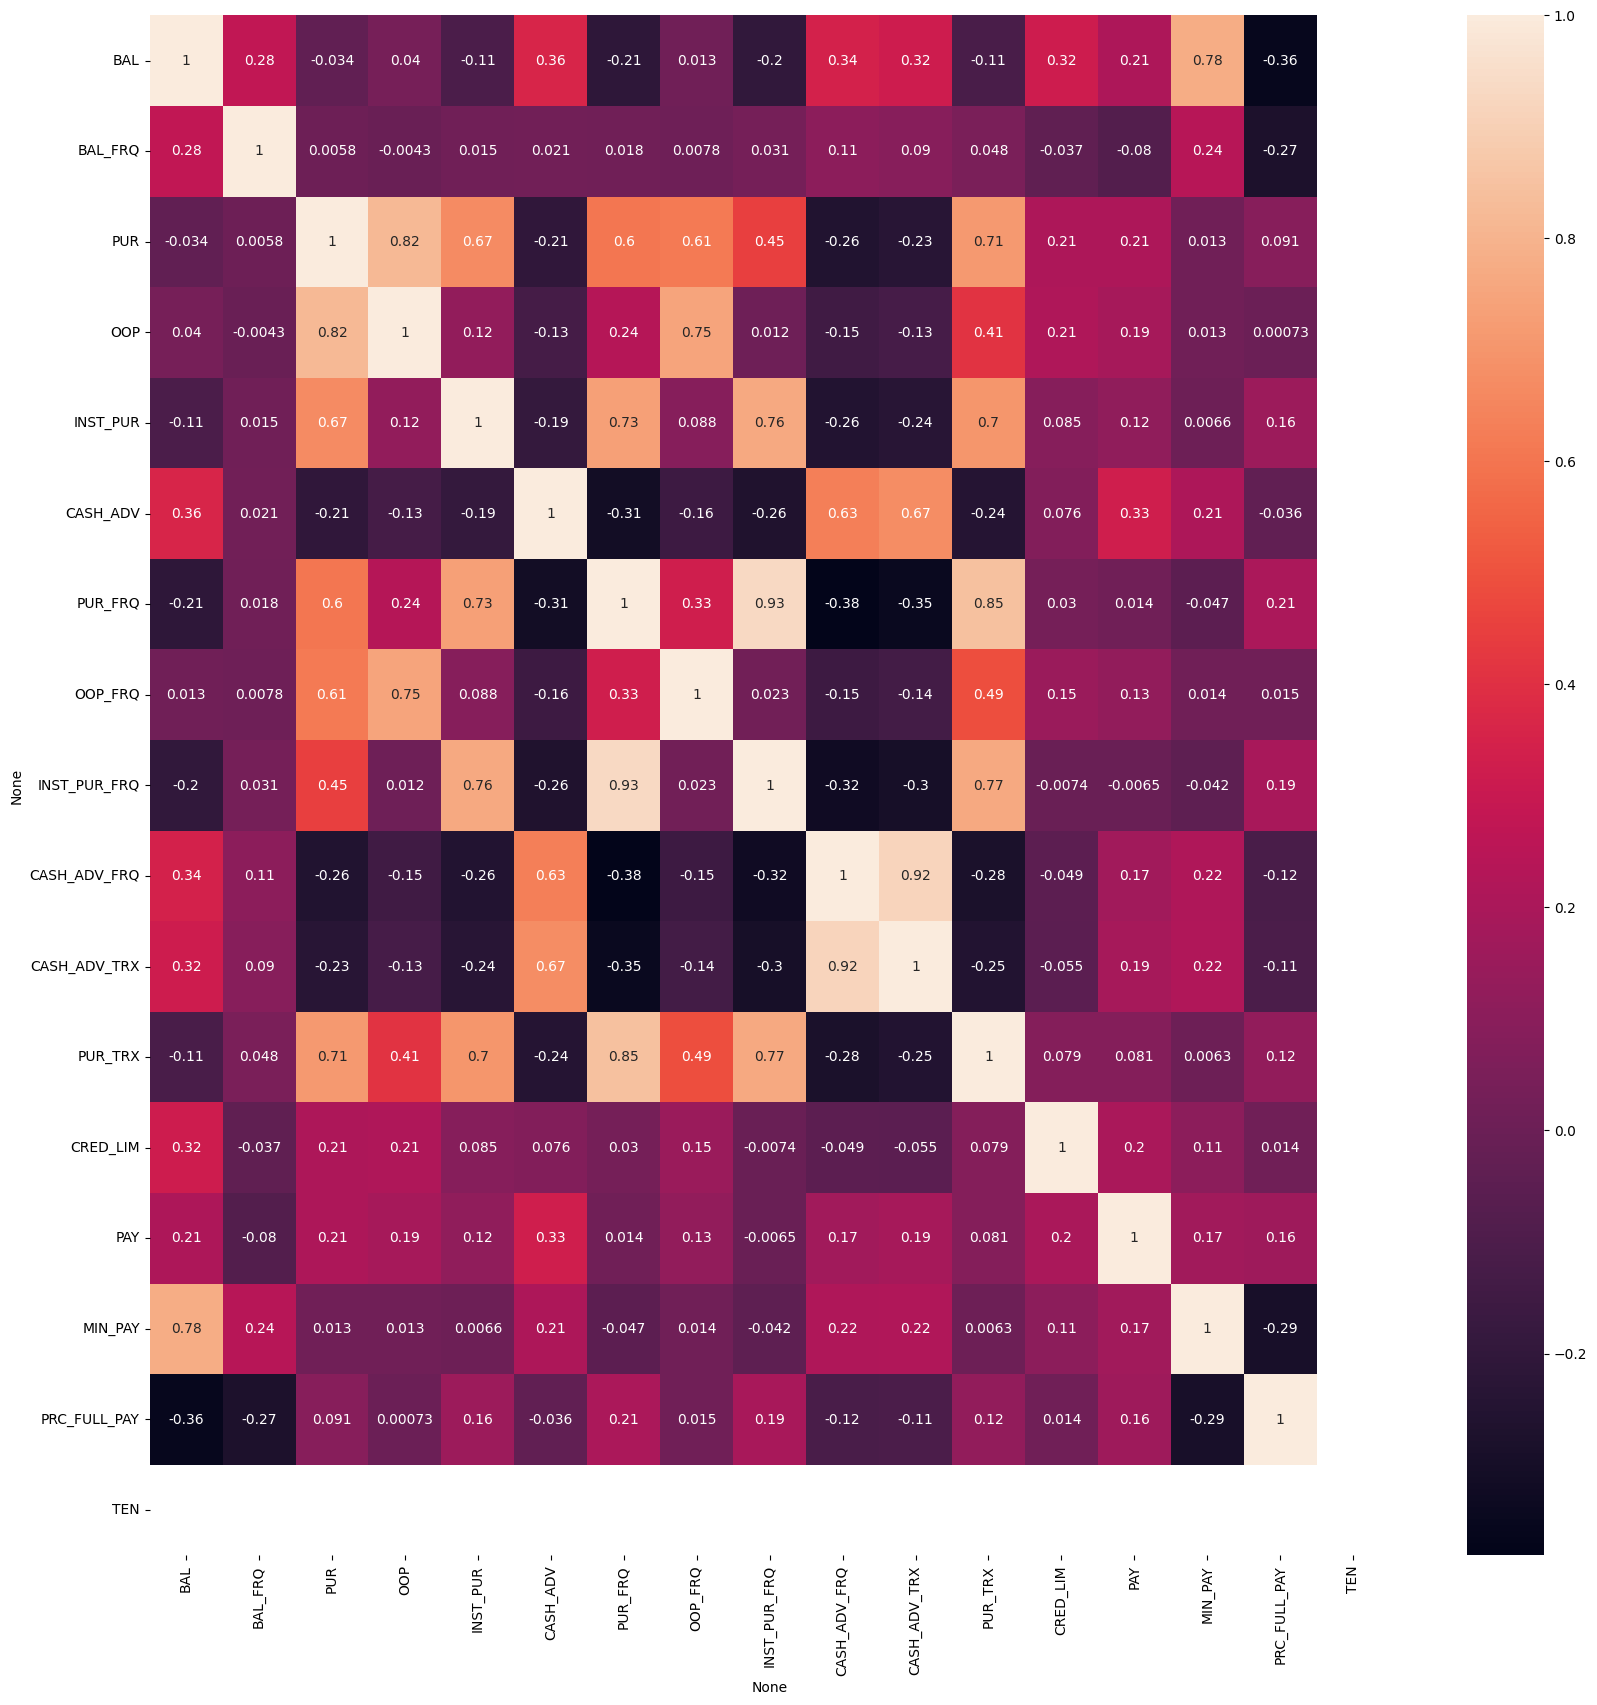

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

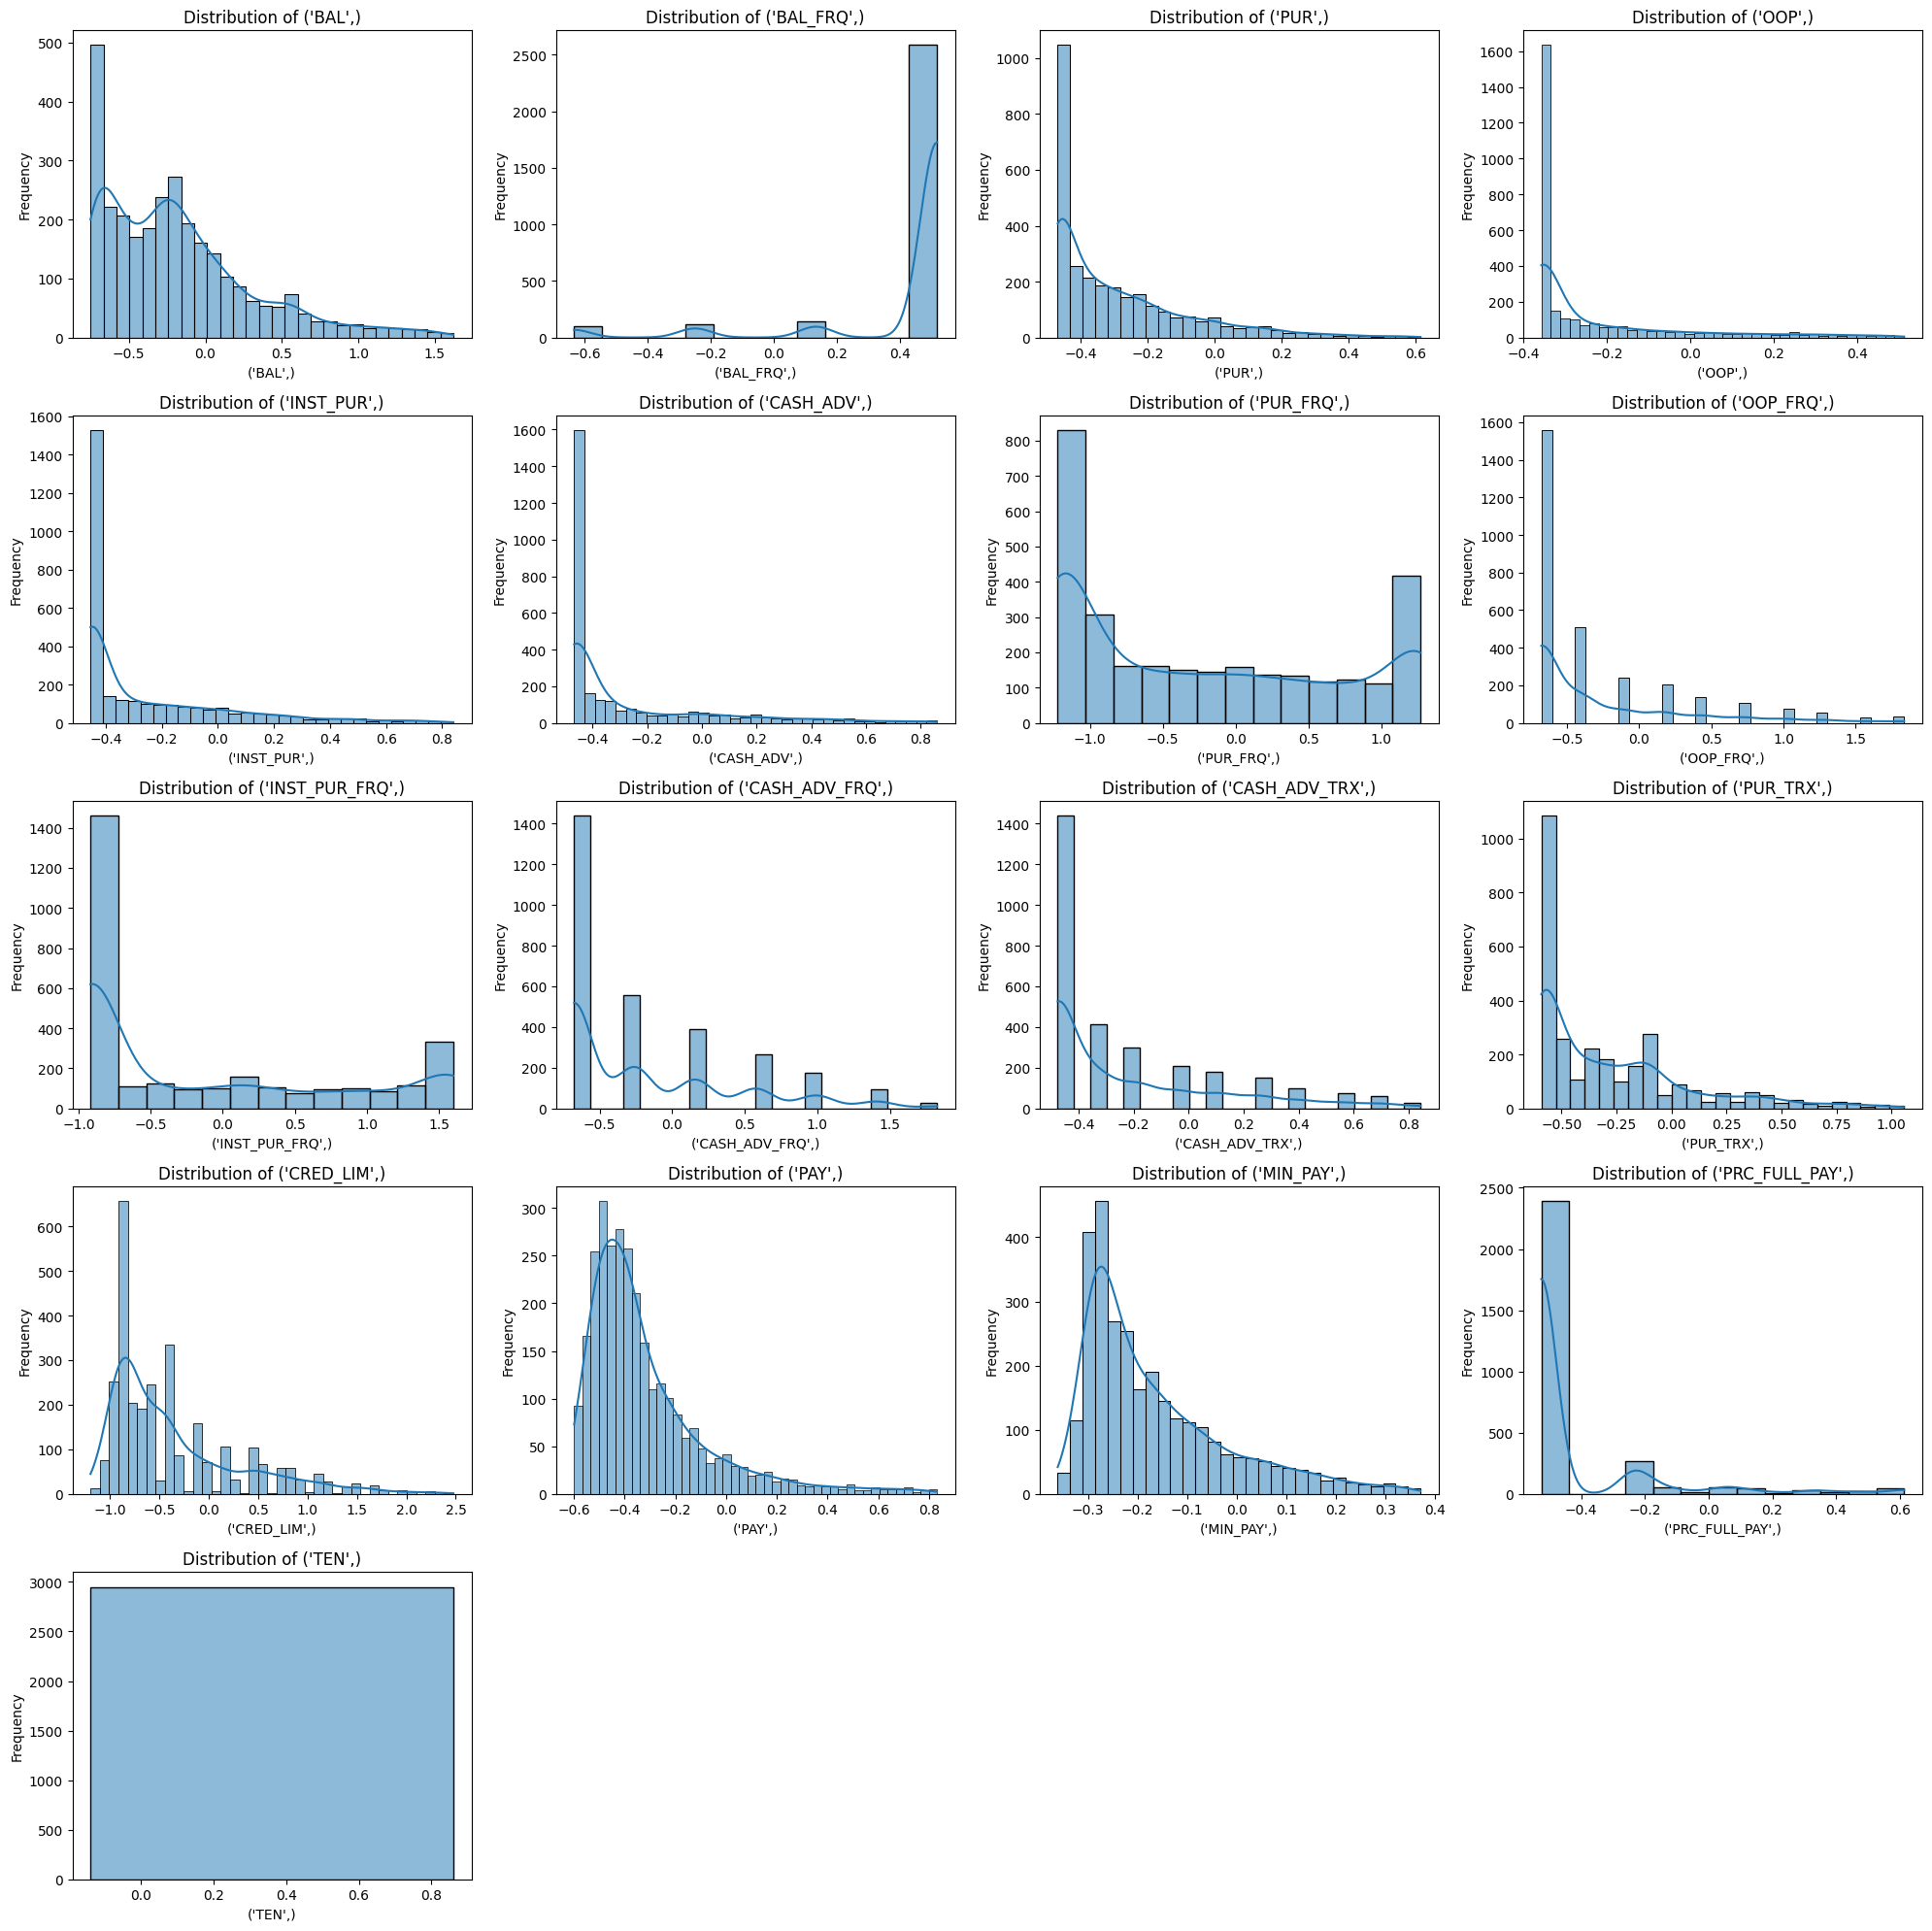

In [ ]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


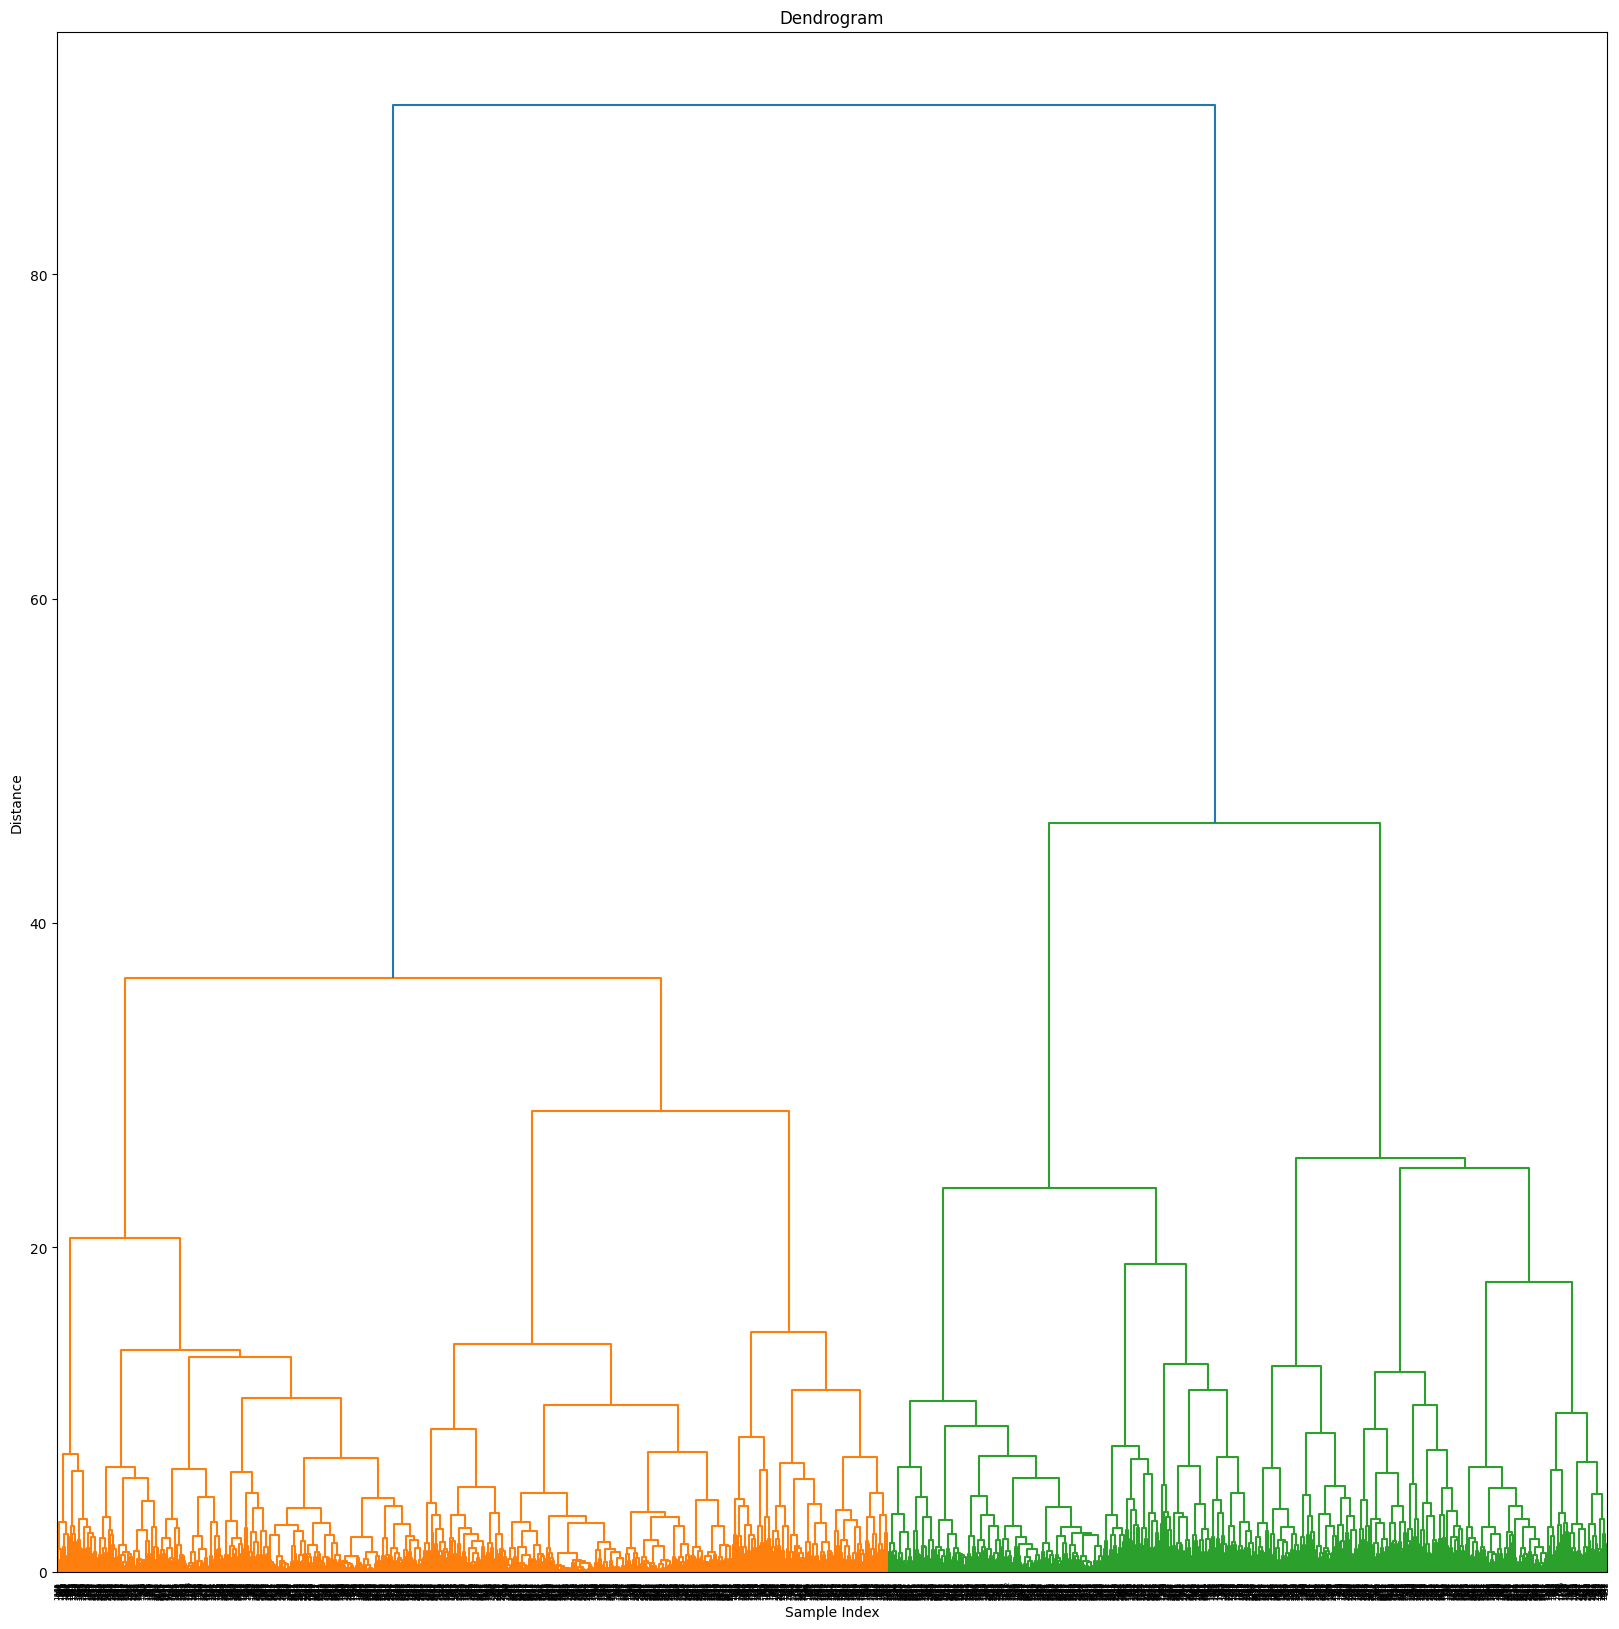

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 20))
sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


# Inference from visualization.

# what can be the best technique to use:



# My Inference from the visualisation for different clustering techinique:

### K-Means Clustering
1. **Correlation Among Features**: The heatmap indicates that many features are highly correlated. This high correlation suggests that k-means clustering might not perform well, as it assumes features are not correlated.

### Gaussian Mixture Models (GMM)
1. **Distribution of Features**: The histplot reveals that most features do not follow a Gaussian distribution. Since GMM assumes that data is generated from a mixture of Gaussian distributions, this deviation from normality means GMM is unlikely to provide accurate clustering results.

### Hierarchical Clustering
1. **Dendrogram Analysis**: The dendrogram suggests that the clusters formed are not distinct or meaningful for this dataset. The hierarchical structure does not align well with the observed data distribution, which limits the effectiveness of this method.

### DBSCAN Clustering
1. **Densely Packed**: If the data points are densely packed, DBSCAN might face challenges in identifying well-separated clusters.
2. **Potential for Better Results**: Given the issues with k-means, GMM, and hierarchical clustering, DBSCAN is likely to provide more meaningful clusters for this dataset. Its ability to handle noise and discover clusters of varying shapes makes it a promising candidate.


# So I will first apply DBScan Algorithm for this clustering problem. As it might gives the better results

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
erange = np.arange(1, 15, 2)
samples_range = np.arange(20, 41, 10)

# Initialize variables to store the best parameters and scores
best_eps = None
best_min_samples = None
best_silhouette_score = -1

# Loop through all parameter combinations
for eps in erange:
    for min_samples in samples_range:
        # Perform DBSCAN clustering with current parameter combination
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df)

        # Compute the Silhouette Score and Calinski-Harabasz Score
        silhouette = silhouette_score(df, labels)

        # Update the best parameters and scores if the current combination is better
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_calinski_harabasz_score = calinski_harabasz
            best_eps = eps
            best_min_samples = min_samples

# Print the best parameters and scores
print("\nBest Parameters for Silhouette Score: eps =", best_eps, "min_samples =", best_min_samples)



Best Parameters for Silhouette Score: eps = 13 min_samples = 20


In [ ]:
dbscan = DBSCAN(eps=13, min_samples=20)
clusters = dbscan.fit_predict(df)
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
silhouette_avg = silhouette_score(df, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'cluster={len(set(clusters))}')

Silhouette Score: 0.85
cluster=2


In [69]:
# here 0 suggest the cluster and -1 represnts the noise
cl = pd.Series(clusters)
cl.value_counts()

0    8943
-1       6
Name: count, dtype: int64

Silhouette Score: 0.85 indicates strong clustering.

# Let's Try K-Means as a comparision to DBScan


In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,n_init=10, init="random", random_state=1)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

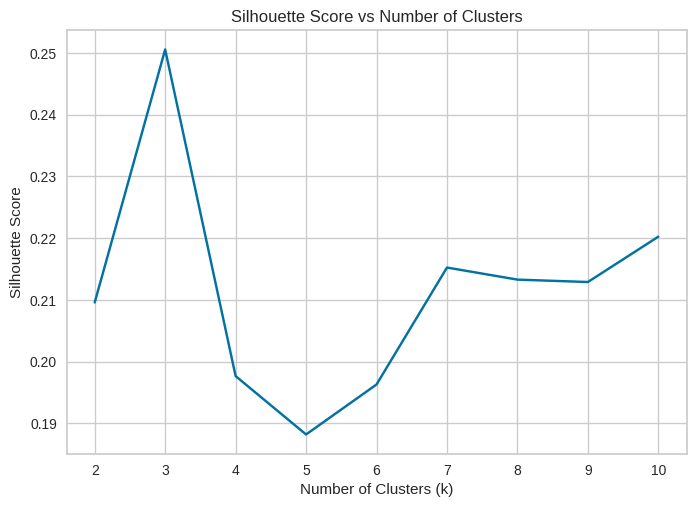

In [ ]:

plt.plot(range(2, 11), silhouette_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

Since for k=3 we have the highest silhoutte score we will use it

In [ ]:
kmeans = KMeans(n_clusters=3,n_init=10, init="random", random_state=1)
labels = kmeans.fit_predict(df)
score = silhouette_score(df, labels)
print(f'Silhouette Score: {score:.2f}')
print(f'cluster={len(set(labels))}')

Silhouette Score: 0.25
cluster=3


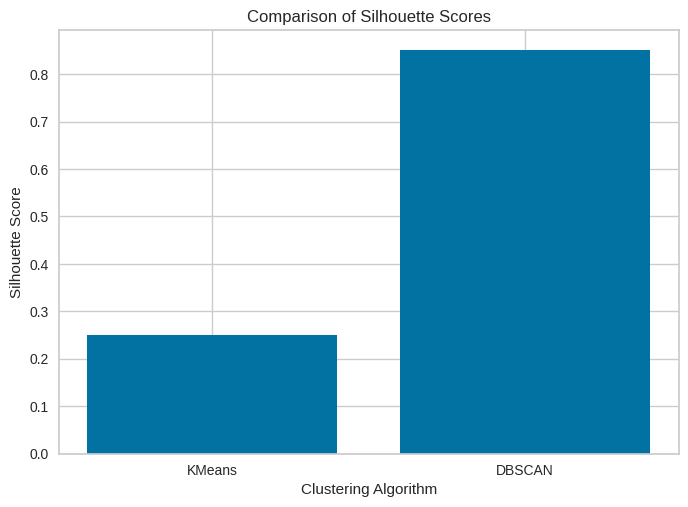

In [ ]:
# comparint the two techniques
import matplotlib.pyplot as plt

algorithms = ['KMeans', 'DBSCAN']
silhouette_scores = [0.25, 0.85]

plt.bar(algorithms, silhouette_scores)

plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores')

plt.show()

The K-means Algorithm generates 3 clusters, however the silhoutte scores is greatly smaller as compared to DBscan.<br>
On the other DBSCAN model identified outliers within the data and created a simpler model with only one cluster.